In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base_ml = pd.read_parquet("base_ml.parquet")
base_ml

,ID,ville_,LIBELLE_DEPT,DEPT_Corse_2A_2B,TYPE_BIEN,DATE,YEAR,Prix_m2,SOURCE,CD_NATUR_OP,NB_SURF_HAB,NB_PIECES,CODE_POSTAL,NATURE_MUTATION,BIEN_NEUF,NB_PIECES_RANGE,NB_SURF_HAB_NA
0,325,PARIS,Paris,75,APT,2025-09-01,2025,13670.885742,CL,ATV,79.0,3.0,75009,None,0,3-4 pièces,False
1,328,LYON,Rhône,69,APT,2025-09-01,2025,4814.814941,CL,AQA,81.0,4.0,69005,None,0,3-4 pièces,False
2,333,NANTES,Loire-Atlantique,44,APT,2025-09-01,2025,3047.619141,CL,AQA,42.0,2.0,44300,None,0,1-2 pièces,False
3,347,MARTIGUES,Bouches-du-Rhône,13,APT,2025-09-01,2025,4058.441650,CL,AQA,77.0,3.0,13500,None,0,3-4 pièces,False
4,340,PARIS,Paris,75,APT,2025-09-01,2025,12619.047852,CL,AQA,21.0,1.0,75007,None,0,1-2 pièces,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143161,2230019,TARBES,None,65,MAI,2015-09-01,2015,1368.421053,DVF,None,76.0,4.0,65000,Vente,0,4 pièces et moins,False
2143162,2229682,PARIS,Paris,75,APT,2015-09-01,2015,6860.465116,CL,AQA,43.0,3.0,75013,Vente,0,3-4 pièces,False
2143163,2230009,MARSEILLE,None,13,APT,2015-09-01,2015,2951.612903,DVF,None,62.0,2.0,13001,Vente,0,1-2 pièces,False
2143164,2229468,COLOMBES,None,92,APT,2015-09-01,2015,NaN,DVF,None,NaN,NaN,92700,Vente,0,None,True


Un univers élémentaire est le croisement:
- d'une zone géographique (commune/département/région)
- d'une ancienneté de bien (neuf/ancien)
- d'un type de logement (appartement/maison)
- d'un nombre de pièces

# Rappel stat univariée

## Répartition du nombre de transaction en France

Répartition du nombre de transactions de bien par an :YEAR
2015     75952
2016    211118
2017    240870
2018    233816
2019    249664
2020    225445
2021    261097
2022    256564
2023    192630
2024    171217
2025     24793
Name: ID, dtype: int64


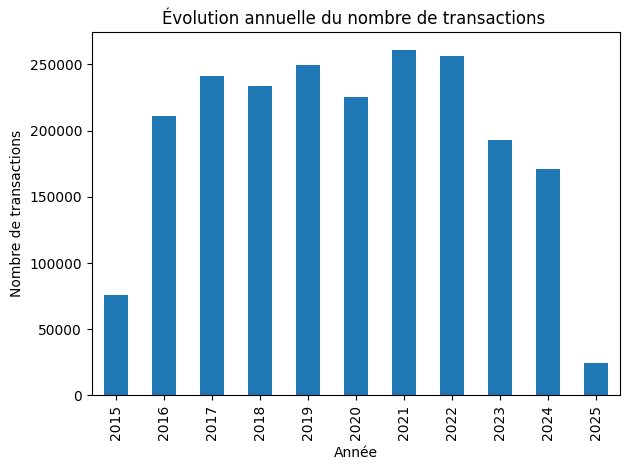

In [2]:
j = base_ml.groupby('YEAR')['ID'].count()
print(f"Répartition du nombre de transactions de bien par an :{j}")

j.plot(kind = 'bar', stacked=False)
plt.title("Évolution annuelle du nombre de transactions ")
plt.xlabel("Année")
plt.ylabel("Nombre de transactions")
plt.tight_layout()
plt.show()


## Zone géographique

### Région

In [3]:
dep_to_region = {
    # Île-de-France
    '75': 'Île-de-France', '77': 'Île-de-France', '78': 'Île-de-France',
    '91': 'Île-de-France', '92': 'Île-de-France', '93': 'Île-de-France',
    '94': 'Île-de-France', '95': 'Île-de-France',

    # Provence-Alpes-Côte d’Azur
    '04': 'Provence-Alpes-Côte d’Azur', '05': 'Provence-Alpes-Côte d’Azur',
    '06': 'Provence-Alpes-Côte d’Azur', '13': 'Provence-Alpes-Côte d’Azur',
    '83': 'Provence-Alpes-Côte d’Azur', '84': 'Provence-Alpes-Côte d’Azur',

    # Auvergne-Rhône-Alpes
    '01': 'Auvergne-Rhône-Alpes', '03': 'Auvergne-Rhône-Alpes', '07': 'Auvergne-Rhône-Alpes',
    '15': 'Auvergne-Rhône-Alpes', '26': 'Auvergne-Rhône-Alpes', '38': 'Auvergne-Rhône-Alpes',
    '42': 'Auvergne-Rhône-Alpes', '43': 'Auvergne-Rhône-Alpes', '63': 'Auvergne-Rhône-Alpes',
    '69': 'Auvergne-Rhône-Alpes', '73': 'Auvergne-Rhône-Alpes', '74': 'Auvergne-Rhône-Alpes',

    # Nouvelle-Aquitaine
    '16': 'Nouvelle-Aquitaine', '17': 'Nouvelle-Aquitaine', '19': 'Nouvelle-Aquitaine',
    '23': 'Nouvelle-Aquitaine', '24': 'Nouvelle-Aquitaine', '33': 'Nouvelle-Aquitaine',
    '40': 'Nouvelle-Aquitaine', '47': 'Nouvelle-Aquitaine', '64': 'Nouvelle-Aquitaine',
    '79': 'Nouvelle-Aquitaine', '86': 'Nouvelle-Aquitaine', '87': 'Nouvelle-Aquitaine',

    # Hauts-de-France
    '02': 'Hauts-de-France', '59': 'Hauts-de-France', '60': 'Hauts-de-France',
    '62': 'Hauts-de-France', '80': 'Hauts-de-France',

    # Grand Est
    '08': 'Grand Est', '10': 'Grand Est', '51': 'Grand Est', '52': 'Grand Est',
    '54': 'Grand Est', '55': 'Grand Est', '57': 'Grand Est', '67': 'Grand Est', '68': 'Grand Est', '88': 'Grand Est',

    # Bourgogne-Franche-Comté
    '21': 'Bourgogne-Franche-Comté', '25': 'Bourgogne-Franche-Comté',
    '39': 'Bourgogne-Franche-Comté', '58': 'Bourgogne-Franche-Comté',
    '70': 'Bourgogne-Franche-Comté', '71': 'Bourgogne-Franche-Comté',
    '89': 'Bourgogne-Franche-Comté', '90': 'Bourgogne-Franche-Comté',

    # Bretagne
    '22': 'Bretagne', '29': 'Bretagne', '35': 'Bretagne', '56': 'Bretagne',

    # Centre-Val de Loire
    '18': 'Centre-Val de Loire', '28': 'Centre-Val de Loire', '36': 'Centre-Val de Loire',
    '37': 'Centre-Val de Loire', '41': 'Centre-Val de Loire', '45': 'Centre-Val de Loire',

    # Normandie
    '14': 'Normandie', '27': 'Normandie', '50': 'Normandie',
    '61': 'Normandie', '76': 'Normandie',

    # Occitanie
    '09': 'Occitanie', '11': 'Occitanie', '12': 'Occitanie', '30': 'Occitanie',
    '31': 'Occitanie', '32': 'Occitanie', '34': 'Occitanie', '46': 'Occitanie',
    '48': 'Occitanie', '65': 'Occitanie', '66': 'Occitanie', '81': 'Occitanie', '82': 'Occitanie',

    # Pays de la Loire
    '44': 'Pays de la Loire', '49': 'Pays de la Loire', '53': 'Pays de la Loire',
    '72': 'Pays de la Loire', '85': 'Pays de la Loire',

    # Corse
    '2A': 'Corse', '2B': 'Corse',

    # DROM
    '971': 'Guadeloupe', '972': 'Martinique', '973': 'Guyane', '974': 'La Réunion', '976': 'Mayotte',

    # Collectivités d’outre-mer (si présentes dans ta base)
    '975': 'Saint-Pierre-et-Miquelon', '977': 'Saint-Barthélemy',
    '978': 'Saint-Martin', '987': 'Polynésie française',
    '986': 'Wallis-et-Futuna', '988': 'Nouvelle-Calédonie'
}

# Ajout de la colonne région
base_ml['REGION'] = base_ml['DEPT_Corse_2A_2B'].astype(str).map(dep_to_region)
print(f"Prix moyen par région:")
prix_my_reg = base_ml.groupby('REGION')["Prix_m2"].mean()
print(prix_my_reg)
print("--" * 25)
print(f"Prix médian par région")
prix_med_reg = base_ml.groupby('REGION')["Prix_m2"].quantile(0.5)
print(prix_med_reg)
print("--" * 25)
nb_trans_reg = base_ml.groupby('REGION')['ID'].count().sort_values(ascending = False)
print(f"Répartition du nombre de transactions par région sur 10 ans :{nb_trans_reg}")

Prix moyen par région:
REGION
Auvergne-Rhône-Alpes          3760.550493
Bourgogne-Franche-Comté       2397.518160
Bretagne                      2651.559051
Centre-Val de Loire           2282.040359
Grand Est                     2406.454528
Hauts-de-France               2381.120611
Normandie                     2581.823386
Nouvelle-Aquitaine            3203.191843
Occitanie                     2830.153924
Pays de la Loire              3085.360248
Provence-Alpes-Côte d’Azur    3659.218773
Île-de-France                 7978.810505
Name: Prix_m2, dtype: float64
--------------------------------------------------
Prix médian par région
REGION
Auvergne-Rhône-Alpes          3560.294118
Bourgogne-Franche-Comté       2302.631579
Bretagne                      2376.736446
Centre-Val de Loire           2133.802817
Grand Est                     2203.125000
Hauts-de-France               2144.578313
Normandie                     2454.545455
Nouvelle-Aquitaine            2933.333333
Occitanie          

### Département

In [4]:
print(f"Prix moyen par département:")
base_ml_prixm2_dept_moy = base_ml.groupby('DEPT_Corse_2A_2B')["Prix_m2"].mean()
print(base_ml_prixm2_dept_moy)
print("--" * 25)
print(f"Prix médian par département")
base_ml_prixm2_dept_median = base_ml.groupby('DEPT_Corse_2A_2B')["Prix_m2"].quantile(0.5)
print(base_ml_prixm2_dept_median)
print("--" * 25)
nb_trans_dept = base_ml.groupby('DEPT_Corse_2A_2B')['ID'].count().sort_values(ascending = False)
print(f"Répartition du nombre de transactions par département sur 10 ans :{nb_trans_dept}")

Prix moyen par département:
DEPT_Corse_2A_2B
02    1541.708607
03    1824.489096
04            NaN
05    2336.402646
06    4647.021830
         ...     
91    4152.596450
92    6313.160952
93    4468.796937
94    5808.551809
95    3282.521224
Name: Prix_m2, Length: 66, dtype: float64
--------------------------------------------------
Prix médian par département
DEPT_Corse_2A_2B
02    1552.238806
03    1700.000000
04            NaN
05    2235.294118
06    4246.666667
         ...     
91    4291.116352
92    6167.049180
93    4080.000000
94    5265.085499
95    3196.721311
Name: Prix_m2, Length: 66, dtype: float64
--------------------------------------------------
Répartition du nombre de transactions par département sur 10 ans :DEPT_Corse_2A_2B
75    314667
13    151454
06    133806
69    122896
31     98389
       ...  
17        29
03        28
07         2
08         1
04         1
Name: ID, Length: 66, dtype: int64


### Commune

In [5]:
print(f"Prix moyen par commune:")
base_ml_prixm2_com_moy = base_ml.groupby('CODE_POSTAL')["Prix_m2"].mean()
print(base_ml_prixm2_com_moy)
print("--" * 25)
print(f"Prix médian par commune")
base_ml_prixm2_com_median = base_ml.groupby('CODE_POSTAL')["Prix_m2"].quantile(0.5)
print(base_ml_prixm2_com_median)
print("--" * 25)
nb_trans_com = base_ml.groupby('CODE_POSTAL')['ID'].count().sort_values(ascending = False)
print(f"Répartition du nombre de transactions par commune sur 10 ans :{nb_trans_com}")

Prix moyen par commune:
CODE_POSTAL
02100            NaN
02290    1423.857302
02680    1555.306835
03460    1824.489096
04900            NaN
            ...     
95800    3220.463417
95815    4193.111353
95842    2591.805007
95848    4170.731707
nan      3417.605258
Name: Prix_m2, Length: 573, dtype: float64
--------------------------------------------------
Prix médian par commune
CODE_POSTAL
02100            NaN
02290    1384.615385
02680    1591.336794
03460    1700.000000
04900            NaN
            ...     
95800    3181.818182
95815    3568.627451
95842    2576.363636
95848    4170.731707
nan      2846.753819
Name: Prix_m2, Length: 573, dtype: float64
--------------------------------------------------
Répartition du nombre de transactions par commune sur 10 ans :CODE_POSTAL
21000    34706
75018    33127
75015    32961
06000    29947
51100    28392
         ...  
06700        1
07501        1
07600        1
08300        1
02100        1
Name: ID, Length: 573, dtype: int64


---

# Ancienneté de bien

Répartition de l'ancienneté des biens sur l'ensemble de la base
--------------------------------------------
            Nombre  Pourcentage (%)
BIEN_NEUF                          
Ancien     1952425             91.1
Neuf        190741              8.9


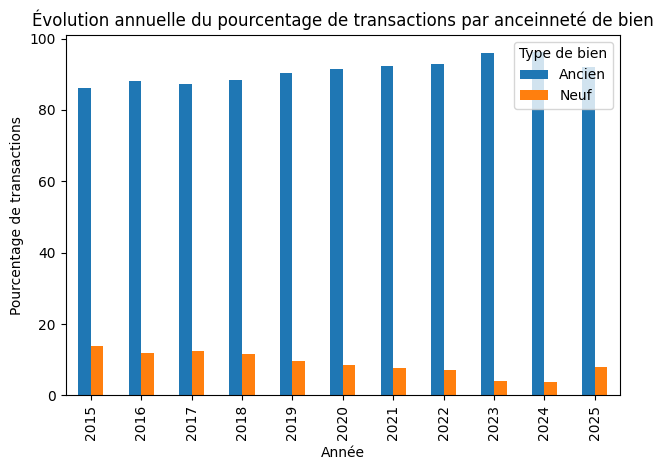

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_ml["BIEN_NEUF"] = np.where(
    (base_ml["NATURE_MUTATION"] == "Vente en l'état futur d'achèvement") |
    (base_ml["CD_NATUR_OP"] == "AQN"),
    "Neuf",
    "Ancien"
)


counts = base_ml['BIEN_NEUF'].value_counts()
percentages = (counts / len(base_ml)) * 100

result_df = pd.DataFrame({
    'Nombre': counts,
    'Pourcentage (%)': percentages.round(2)
})
print("Répartition de l'ancienneté des biens sur l'ensemble de la base")
print("--" * 22)
print(result_df)


df_grouped = base_ml.groupby(['YEAR', 'BIEN_NEUF'])['ID'].count().reset_index(name='Nombre_transactions')


total_per_year = df_grouped.groupby('YEAR')['Nombre_transactions'].sum()


pivot_df = df_grouped.pivot(index='YEAR', columns='BIEN_NEUF', values='Nombre_transactions')


pourcentage_df = pivot_df.div(total_per_year, axis=0) * 100


pourcentage_df.plot(kind='bar', stacked=False)
plt.title("Évolution annuelle du pourcentage de transactions par anceinneté de bien")
plt.xlabel("Année")
plt.ylabel("Pourcentage de transactions")
plt.legend(title="Type de bien")
plt.tight_layout()
plt.show()

---

# Type de logement

Répartition du nombre de transactions d'appartements sur 10 ans :
YEAR
2021    211113
2022    210348
2019    203638
2017    197409
2018    191470
2020    182964
2016    171875
2023    157870
2024    139425
2015     62746
2025     20316
Name: ID, dtype: int64

Répartition du nombre de transactions de maisons sur 10 ans :
YEAR
2021    49984
2022    46216
2019    46026
2017    43461
2020    42481
2018    42346
2016    39243
2023    34760
2024    31792
2015    13206
2025     4477
Name: ID, dtype: int64


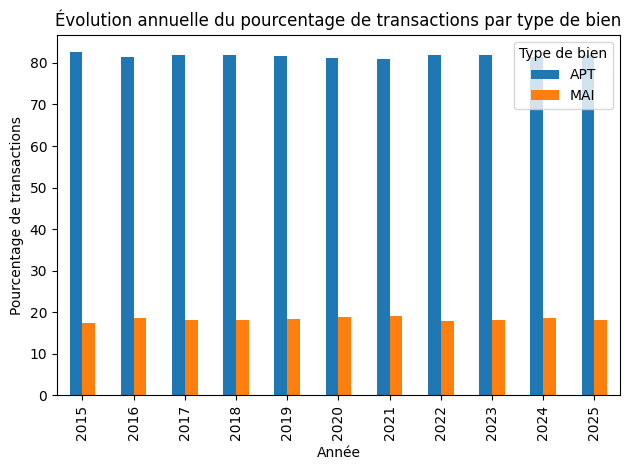

In [20]:

r = base_ml[base_ml['TYPE_BIEN'] == 'APT'].groupby('YEAR')['ID'].count().sort_values(ascending=False)
l = base_ml[base_ml['TYPE_BIEN'] == 'MAI'].groupby('YEAR')['ID'].count().sort_values(ascending=False)

print("Répartition du nombre de transactions d'appartements sur 10 ans :")
print(r)
print("\nRépartition du nombre de transactions de maisons sur 10 ans :")
print(l)


df_grouped = base_ml.groupby(['YEAR', 'TYPE_BIEN'])['ID'].count().reset_index(name='Nombre_transactions')


total_per_year = df_grouped.groupby('YEAR')['Nombre_transactions'].sum()


pivot_df = df_grouped.pivot(index='YEAR', columns='TYPE_BIEN', values='Nombre_transactions')


pourcentage_df = pivot_df.div(total_per_year, axis=0) * 100


pourcentage_df.plot(kind='bar', stacked=False)
plt.title("Évolution annuelle du pourcentage de transactions par type de bien")
plt.xlabel("Année")
plt.ylabel("Pourcentage de transactions")
plt.legend(title="Type de bien")
plt.tight_layout()
plt.show()



---

# Répartition du nombre de pièces

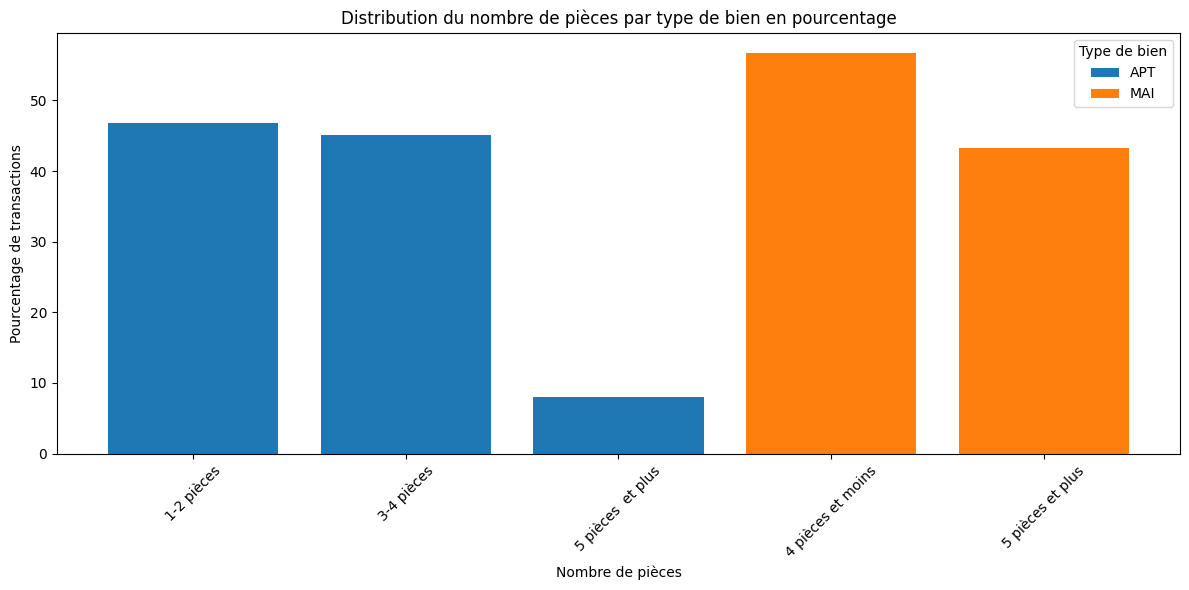

In [24]:
bins_apt = [0, 2, 4, np.inf]
labels_apt = ["1-2 pièces", "3-4 pièces", "5 pièces  et plus"]

bins_mai = [0, 4, np.inf]
labels_mai = ["4 pièces et moins", "5 pièces et plus"]

base_ml["NB_PIECES_RANGE"] = None

base_ml.loc[base_ml['TYPE_BIEN'] == 'APT', 'NB_PIECES_RANGE'] = pd.cut(
    base_ml.loc[base_ml['TYPE_BIEN'] == 'APT', 'NB_PIECES'],
    bins = bins_apt,
    labels = labels_apt,
    right = True,
    include_lowest = True
)

base_ml.loc[base_ml['TYPE_BIEN'] == 'MAI', 'NB_PIECES_RANGE'] = pd.cut(
    base_ml.loc[base_ml['TYPE_BIEN'] == 'MAI', 'NB_PIECES'],
    bins = bins_mai,
    labels = labels_mai,
    right = True,
    include_lowest = True
)


# Calculer la distribution
distribution = base_ml.groupby(['TYPE_BIEN', 'NB_PIECES_RANGE'])['ID'].count().reset_index(name='Nombre')
tot = distribution.groupby("TYPE_BIEN")["Nombre"].transform("sum")
distribution['Pourcentage'] =(distribution['Nombre'] / tot) * 100

fig, ax = plt.subplots(figsize=(12, 6))
for bien in distribution['TYPE_BIEN'].unique():
    subset = distribution[distribution['TYPE_BIEN'] == bien]
    ax.bar(subset['NB_PIECES_RANGE'], subset['Pourcentage'], label=bien)

plt.title("Distribution du nombre de pièces par type de bien en pourcentage")
plt.xlabel("Nombre de pièces")
plt.ylabel("Pourcentage de transactions")
plt.xticks(rotation=45)
plt.legend(title="Type de bien")
plt.tight_layout()
plt.show()
